In [23]:
from numpy import linalg
import matplotlib.pyplot as plt 
from sympy import *
from sympy.solvers import *
from math import *
from scipy.optimize import fsolve
import timeit


## Методы Рунге-Кутты 1-ого  и 4-ого порядков


###  Решаем уравнение Ван-дер-Поля. 

In [45]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, a):
    return (-a*((u*u*u)/3 - u) + a*v)
def g(t,u,v,a):
    return (-u)




$1$ Реализуем метод ЧЕТВЕРТОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 


Графики при  a = 1


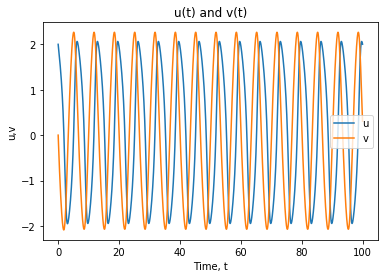

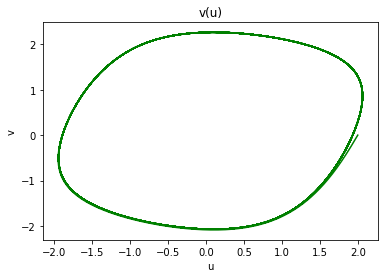

Графики при  a = 10


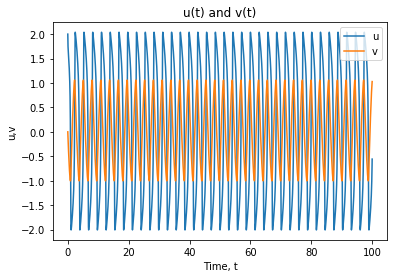

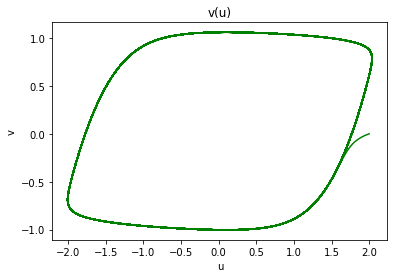

Графики при  a = 100


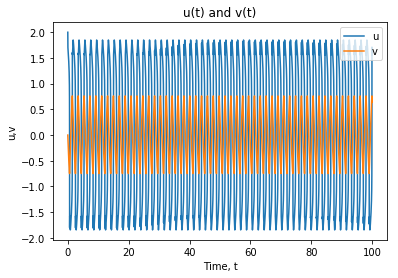

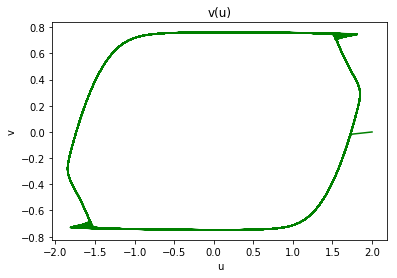

Графики при  a = 1000


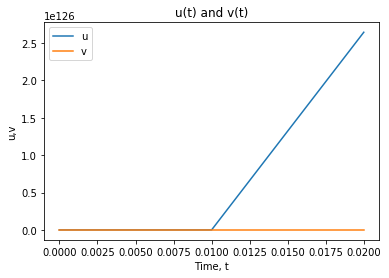

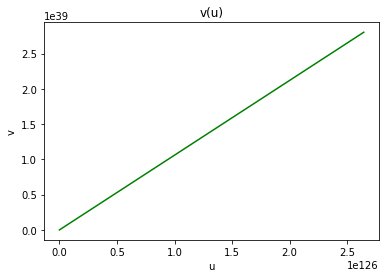

In [93]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    while t < 100:
        
        # Делаем итерацию явного метода Рунге-Кутты четвертого порядка
        
        k1=h*f(t,u,v,a[i])
        l1=h*g(t,u,v,a[i])
        k2=h*f(t + 0.5*h, u + 0.5*k1, 0.5*l1 + v,a[i])
        l2 = h * g(t + 0.5 * h, u + 0.5 * k1, 0.5 * l1 + v,a[i])
        k3 = h * f(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        l3 = h * g(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        k4 = h * f(t + h, u + k3,  l3 + v,a[i])
        l4 = h * g(t + h, u + k3,  l3 + v,a[i])
        
        
        u = u + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        v = v + 1/6 * (l1 + 2 * l2 + 2 * l3 + l4)
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
        
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()




## Выводы
$1.$ При малых значениях параметра $a$ метод отражает "реальную" фазовую траекторию. Это связано с тем, что при таких параметрах задача "менее" жесткая и явный метод Рунге-Кутты сходится к истинному решению.

$2.$ При больших значениях параметра $a$ часть истинной фазовой траектории " почти линейна", что и отражает этот метод. Но в связи с тем, что задача жесткая, явные методы не всегда сходятся к истинному решению.

$3.$ Увеличение шага приводит к тому, что численное решение "приближается" к исходному. 

$2$ Реализуем метод ПЕРВОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$.



Графики при  a = 1


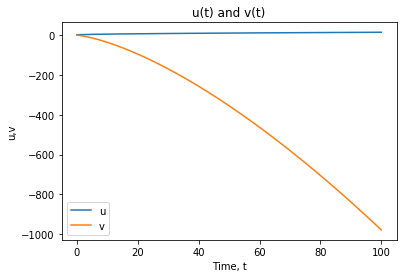

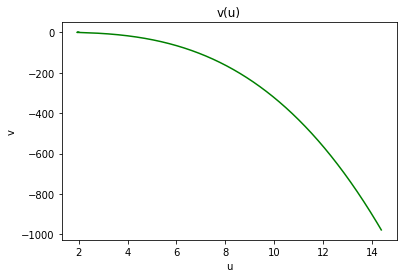

Графики при  a = 10


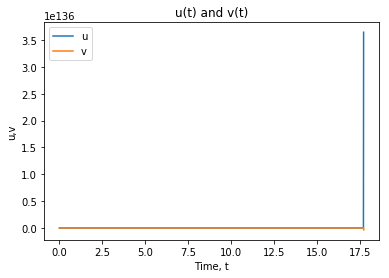

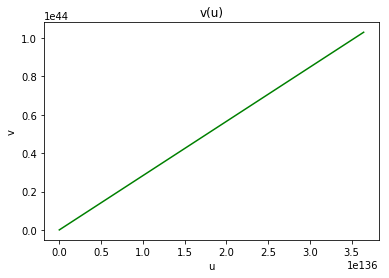

Графики при  a = 100


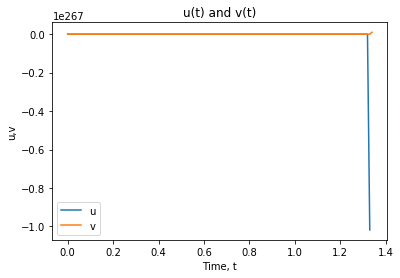

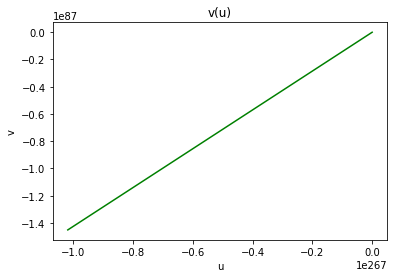

Графики при  a = 1000


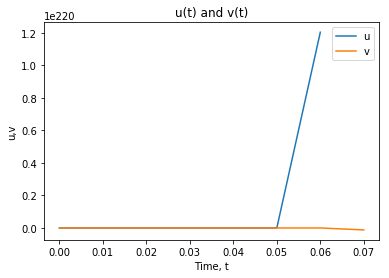

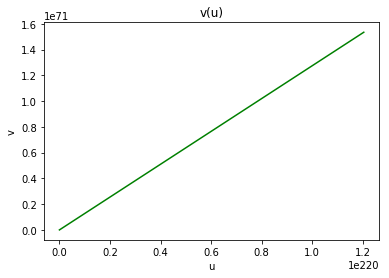

In [26]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    # Делаем итерацию явного метода Рунге-Кутты первого порядка
        
    while t < 100:
    
        k1 = h*f(t,u,v,a[i])
        l1 = h*g(t,u,v,a[i])

        u = u + k1
        v = v + l1
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()



    
    
    

## Выводы
$1.$ Методы первого порядка очевидно "хуже" сходятся к решению,чем четвертого порядка. Они при всех параметрах отображают "почти" линеные фазовые траектории, что не всегда так (при маленьких параметрах - части предельного цикла - нелинейны.

### Решаем уравнение Бонгоффера-Ван-дер-Поля


In [79]:
def f(t, u, v, a):
    return (-a*((u*u*u)/3 - u) + a*v)
def g(t,u,v,a):
    return (-u - b*v + c)

$1$ Реализуем метод ЧЕТВЕРТОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 

0.001
0
Графики при  a = 1


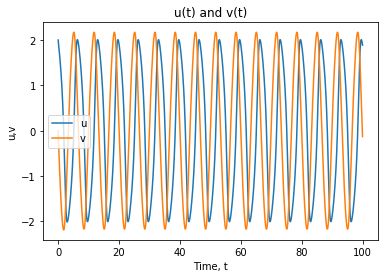

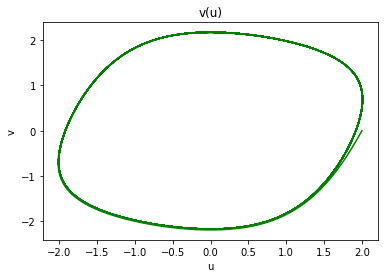

Графики при  a = 10


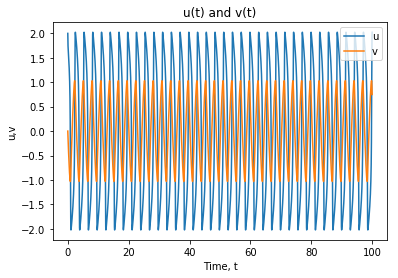

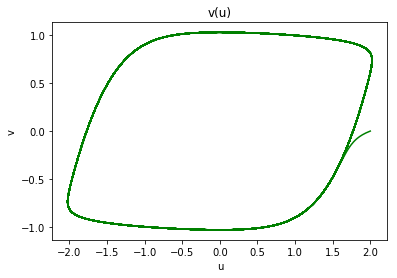

Графики при  a = 100


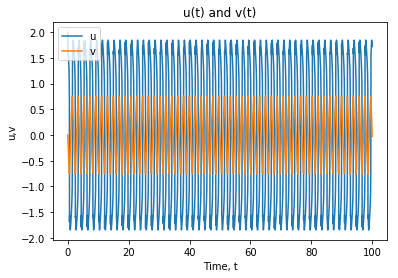

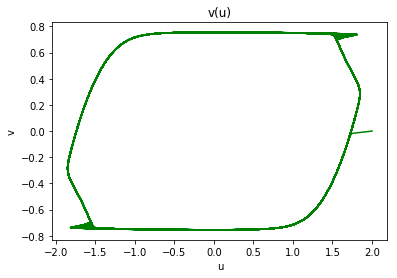

Графики при  a = 1000


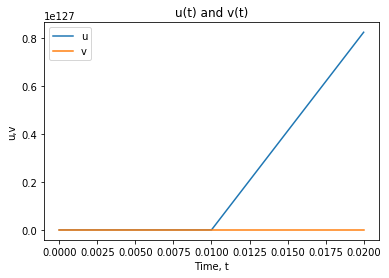

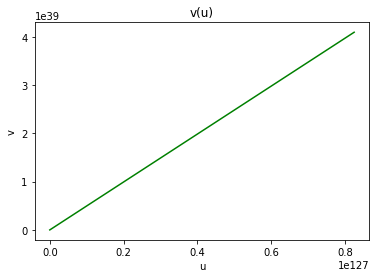

In [96]:
i = 0 
b = float(input())
c = float(input())
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    while t < 100:
        
        # Делаем итерацию явного метода Рунге-Кутты четвертого порядка
        
        k1=h*f(t,u,v,a[i])
        l1=h*g(t,u,v,a[i])
        k2=h*f(t + 0.5*h, u + 0.5*k1, 0.5*l1 + v,a[i])
        l2 = h * g(t + 0.5 * h, u + 0.5 * k1, 0.5 * l1 + v,a[i])
        k3 = h * f(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        l3 = h * g(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        k4 = h * f(t + h, u + k3,  l3 + v,a[i])
        l4 = h * g(t + h, u + k3,  l3 + v,a[i])
        
        
        u = u + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        v = v + 1/6 * (l1 + 2 * l2 + 2 * l3 + l4)
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
        
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()

$2$ Реализуем метод ПЕРВОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$.

Графики при  a = 1


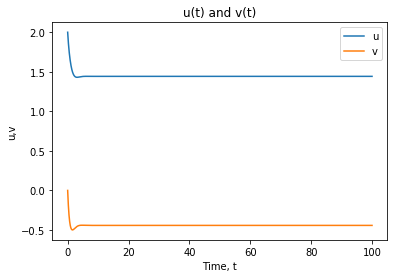

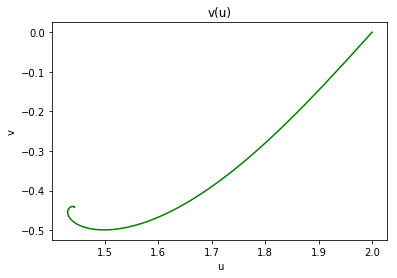

Графики при  a = 10


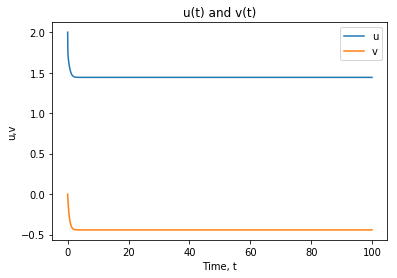

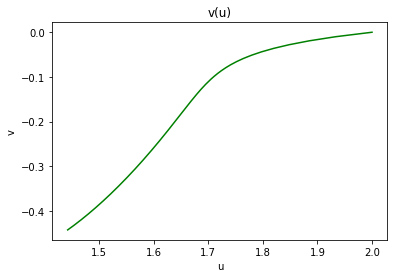

Графики при  a = 100


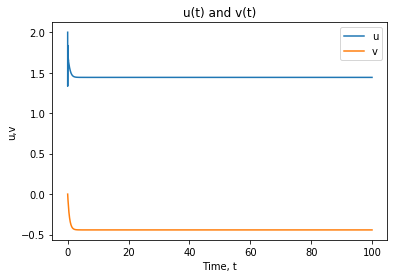

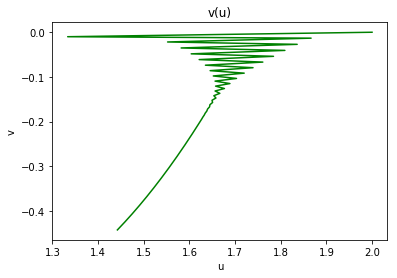

Графики при  a = 1000


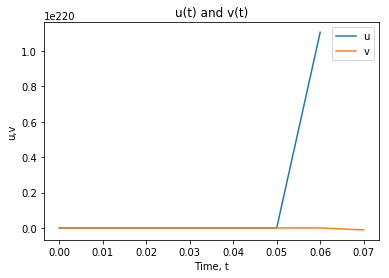

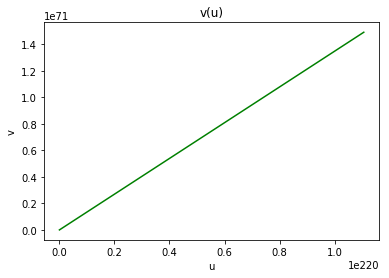

In [29]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    # Делаем итерацию явного метода Рунге-Кутты первого порядка
        
    while t < 100:
    
        k1 = h*f(t,u,v,a[i])
        l1 = h*g(t,u,v,a[i])

        u = u + k1
        v = v + l1
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


### Неавтономное уравнение Ван-дер-Поля, траектория-«утка»

In [69]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, w):
    return (-10*((u*u*u)/3 - u) + 10*v)
def g(t,u,v,w):
    return (-u + cos(w*t))


$1$ Реализуем метод ЧЕТВЕРТОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 

Графики при  a = 1


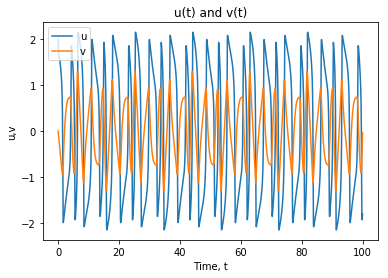

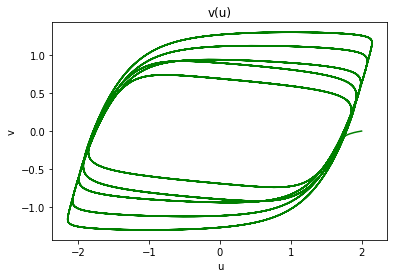

Графики при  a = 10


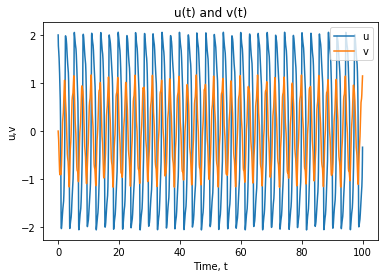

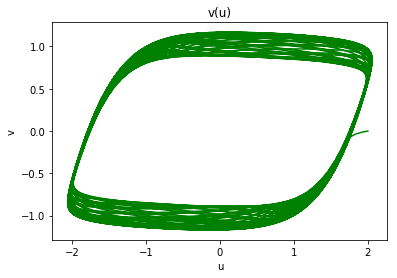

Графики при  a = 100


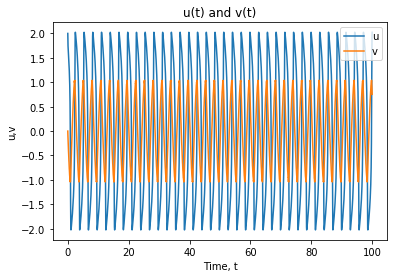

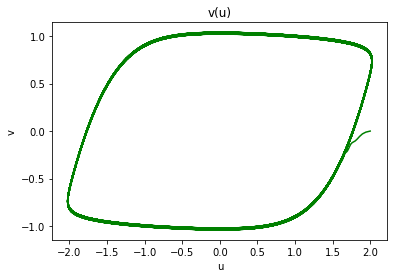

Графики при  a = 1000


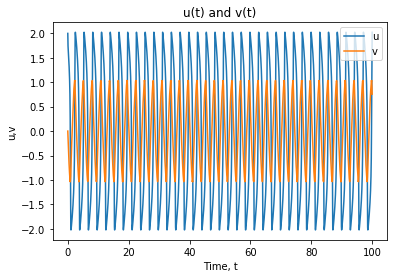

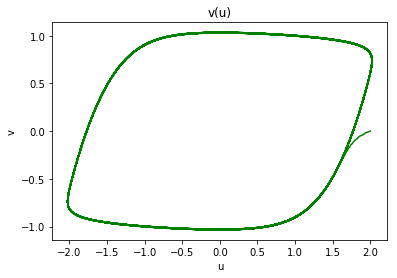

In [71]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    while t < 100:
        
        # Делаем итерацию явного метода Рунге-Кутты четвертого порядка
        
        k1=h*f(t,u,v,a[i])
        l1=h*g(t,u,v,a[i])
        k2=h*f(t + 0.5*h, u + 0.5*k1, 0.5*l1 + v,a[i])
        l2 = h * g(t + 0.5 * h, u + 0.5 * k1, 0.5 * l1 + v,a[i])
        k3 = h * f(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        l3 = h * g(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        k4 = h * f(t + h, u + k3,  l3 + v,a[i])
        l4 = h * g(t + h, u + k3,  l3 + v,a[i])
        
        
        u = u + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        v = v + 1/6 * (l1 + 2 * l2 + 2 * l3 + l4)
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
        
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()

## Выводы
Видно, что данный метод, действительно стремится к исходному решению.

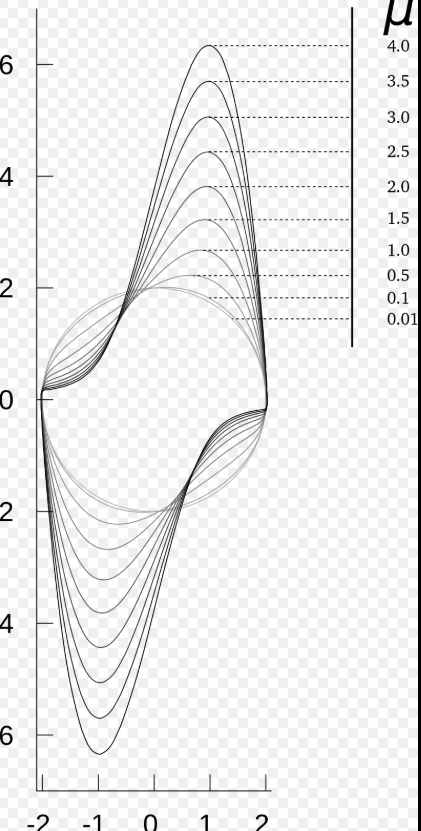

In [32]:
from IPython.display import Image 
Image(filename='Screenshot_1.png')

## Выводы
$1.$ И явный метод Рунге-Кутты 1 и 4 порядков сходятся к решению (фазовая траектория - цикл) потому, что задача "менее" жесткая.

$1$ Реализуем метод ПЕРВОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 

Графики при  a = 1


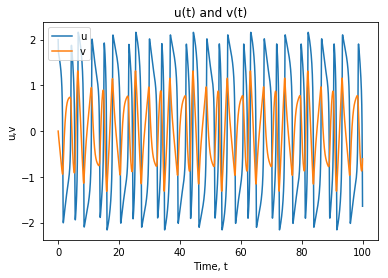

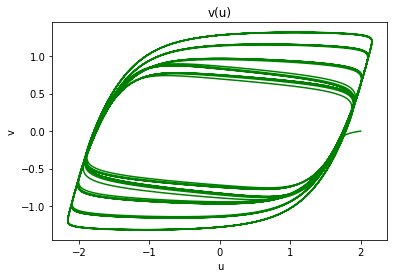

Графики при  a = 10


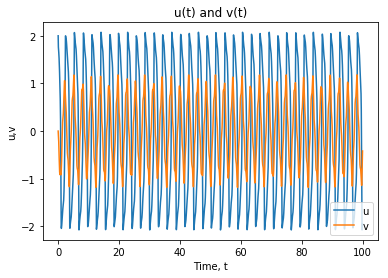

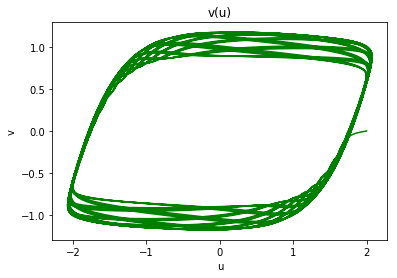

Графики при  a = 100


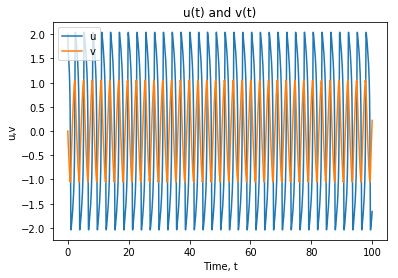

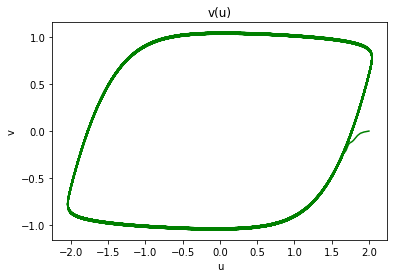

Графики при  a = 1000


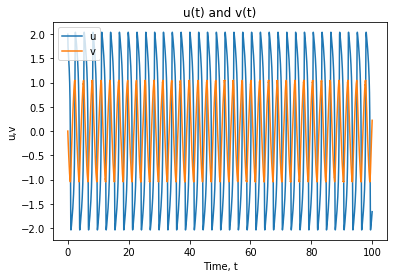

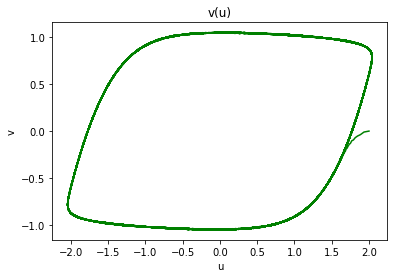

In [33]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    # Делаем итерацию явного метода Рунге-Кутты первого порядка
        
    while t < 100:
    
        k1 = h*f(t,u,v,a[i])
        l1 = h*g(t,u,v,a[i])

        u = u + k1
        v = v + l1
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


### Уравнение Рэлея


Сведем задачу к системе дифференциальных уравнений первого порядка заменой $\dot{x} = y_1$. Тогда получим систему 

$\dot{y_1} = a(1 - y_1^2)y_1 - y_2$

$\dot{y_2} = y_1$ 

In [72]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, a):
    return (a*(1 - u*u)*u - v)
def g(t,u,v,a):
    return (u)

$1$ Реализуем метод ЧЕТВЕРТОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 

Графики при  a = 1


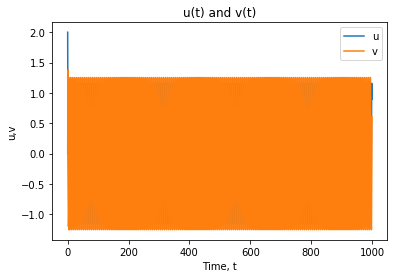

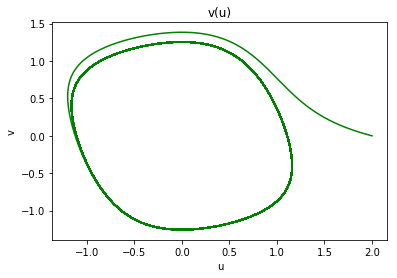

Графики при  a = 10


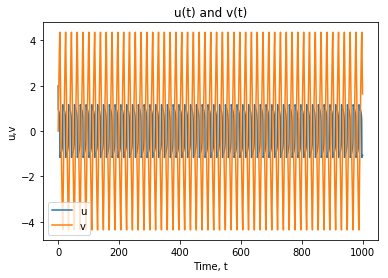

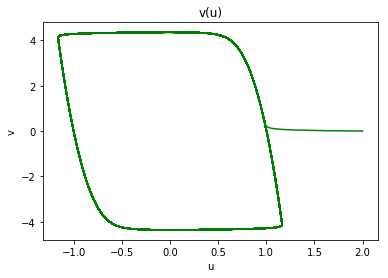

Графики при  a = 100


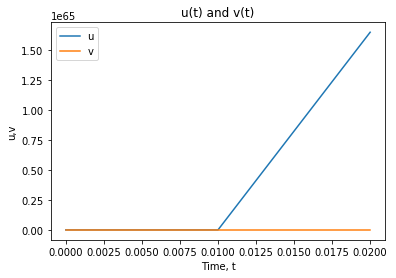

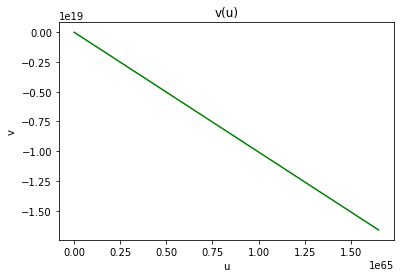

Графики при  a = 1000


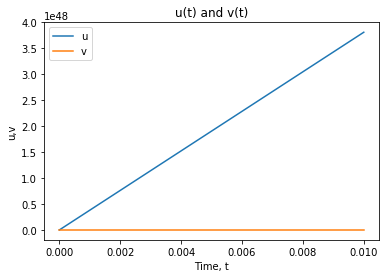

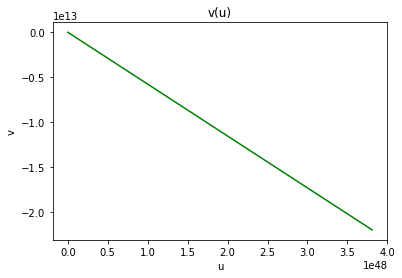

In [74]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    while t < 1000:
        
        # Делаем итерацию явного метода Рунге-Кутты четвертого порядка
        
        k1=h*f(t,u,v,a[i])
        l1=h*g(t,u,v,a[i])
        k2=h*f(t + 0.5*h, u + 0.5*k1, 0.5*l1 + v,a[i])
        l2 = h * g(t + 0.5 * h, u + 0.5 * k1, 0.5 * l1 + v,a[i])
        k3 = h * f(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        l3 = h * g(t + 0.5 * h, u + 0.5 * k2, 0.5 * l2 + v,a[i])
        k4 = h * f(t + h, u + k3,  l3 + v,a[i])
        l4 = h * g(t + h, u + k3,  l3 + v,a[i])
        
        
        u = u + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        v = v + 1/6 * (l1 + 2 * l2 + 2 * l3 + l4)
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
        
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()



$1$ Реализуем метод ПЕРВОГО порядка.Строим соответствующие графики зависимости $u(t)$, $v(t)$, $u(v)$. 

Графики при  a = 1


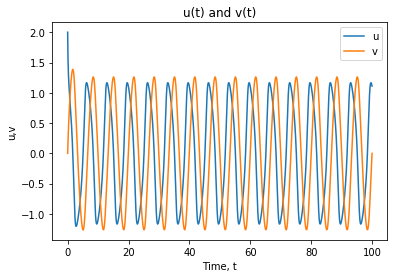

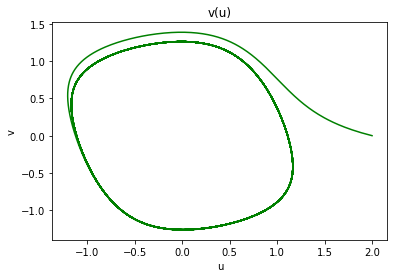

Графики при  a = 10


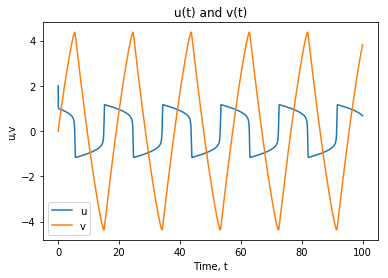

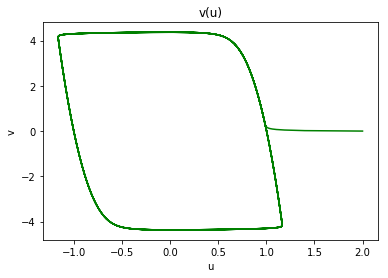

Графики при  a = 100


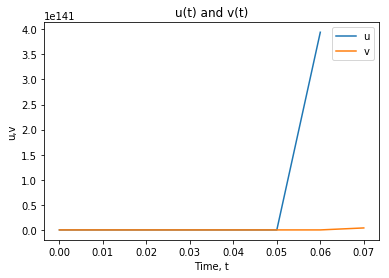

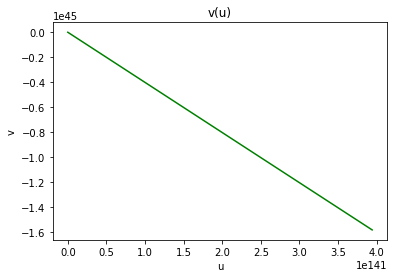

Графики при  a = 1000


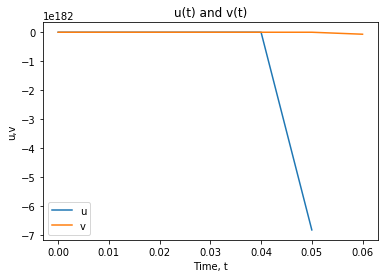

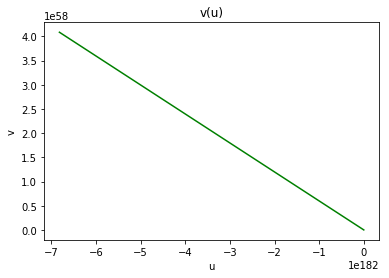

In [36]:
i = 0 
a = [1,10,100,1000]
# print(len(a))

for i in range (len(a)):
    
    t = 0
    
    f1 = open('Rung1.txt', 'w')
    f2 = open('Rung2.txt', 'w')
    f3 = open('Rung3.txt', 'w')
    
    u = 2
    v = 0
    h = 0.01
    s1 = []
    s2 = []
    T = []
    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')
    
    # Делаем итерацию явного метода Рунге-Кутты первого порядка
        
    while t < 100:
    
        k1 = h*f(t,u,v,a[i])
        l1 = h*g(t,u,v,a[i])

        u = u + k1
        v = v + l1
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", a[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


## Выводы 
### Уравнение Ван-дер-Поля

## Метод Хаммера-Холлинсворта

### Решаем уравнение Ван-дер-Поля


In [75]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, a):
    return (-a*((u*u*u)/3 - u) + a*v)
def g(t,u,v,a):
    return (-u)

Графики при  a = 1


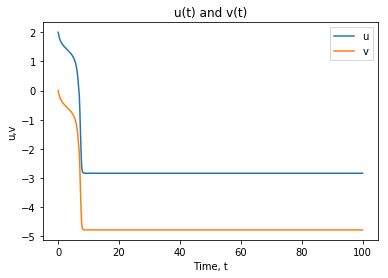

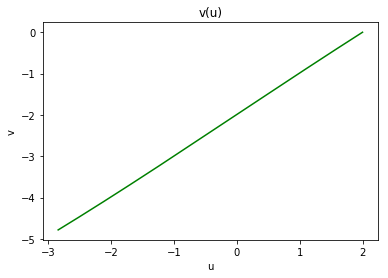

Графики при  a = 10


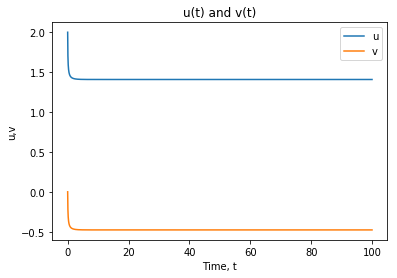

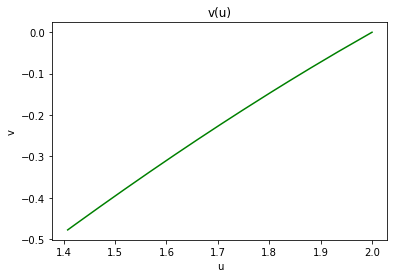

Графики при  a = 100


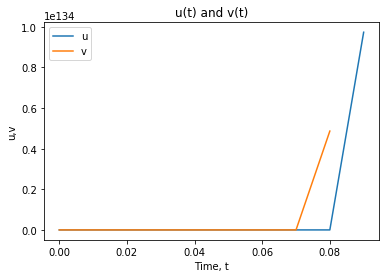

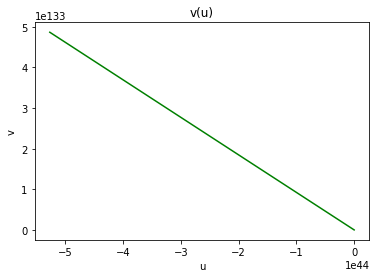

Графики при  a = 1000


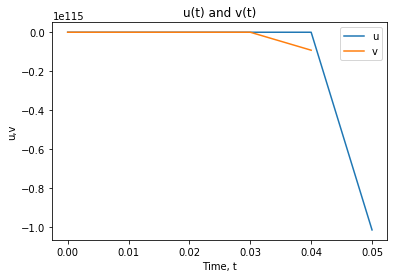

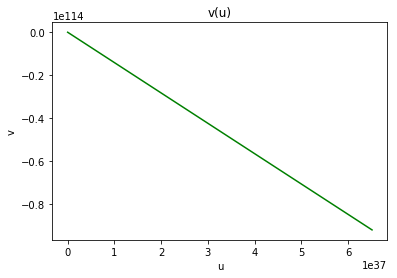

In [76]:
i = 0 
mas = [1,10,100,1000]
# print(len(a))

for i in range (len(mas)):
    
    t = 0

    f1 = open('Rung111.txt', 'w')
    f2 = open('Rung112.txt', 'w')
    f3 = open('Rung113.txt', 'w')

    h=0.01 #Длина шага у сеточной функции

    t = 0
    u = 2
    v = 0


    s1 = []
    s2 = []
    s3 = []
    T = []

    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')

    k1 = 0
    k2 = 0
    k3 = 0
    eps = 0.1
    
    while (t < 100):
        a = 0
        b = 0
        N = 0
        while (N < 100):
            a = f(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            b = g(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            N = N + 1
            if (abs(a - k1) + abs(b - k2)  < eps):
                      break
            else:
                k1 = a
                l1 = b

        if (N == 100):  # ЕСЛИ МЕТОД ПРОСТОЙ ИТЕРАЦИИ ПЛОХО СХОДИТСЯ, ТО НА ЭТОМ ШАГЕ ЗАМЕНЯЕМ НЕЯВНЫЙ МЕТОД РУНГЕ-КУТТЫ НА ЯВНЫЙ
            u = u + h*f(t,u,v,mas[i])
            v = v + h*f(t,u,v,mas[i])
        else:
            u = u + 0.5*h*f(t,u,v,mas[i])
            v = v + 0.5*h*f(t,u,v,mas[i])
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')

    f1.close()
    f2.close()
    f3.close()
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", mas[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


    


## Решаем уравнение Бонгоффера-Ван-дер-Поля

In [77]:
def f(t, u, v, a):
    return (-a*((u*u*u)/3 - u) + a*v)
def g(t,u,v,a):
    return (-u - v + 1)

Графики при  a = 1


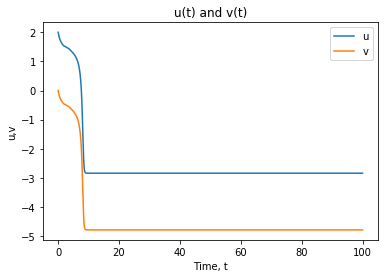

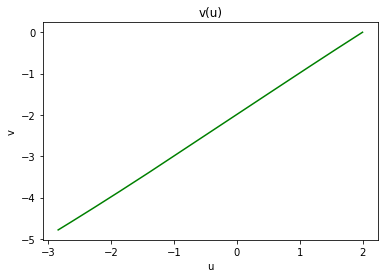

Графики при  a = 10


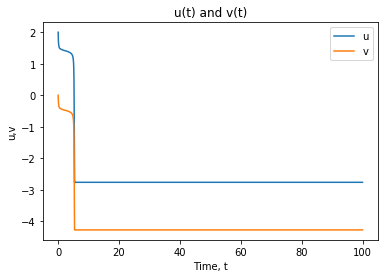

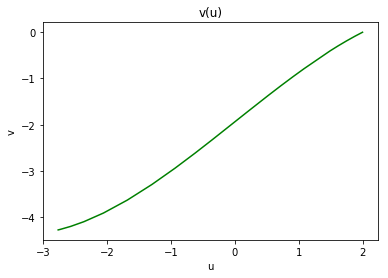

Графики при  a = 100


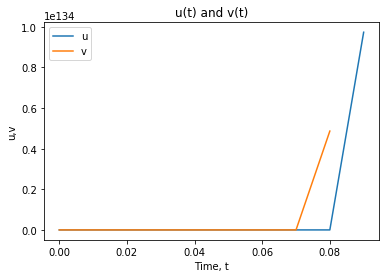

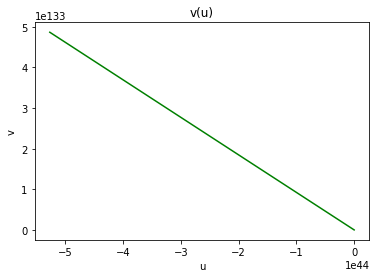

Графики при  a = 1000


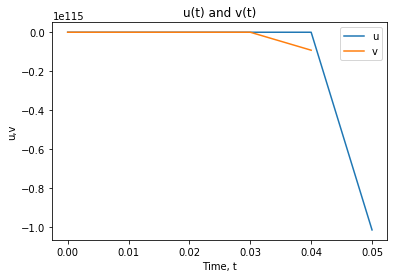

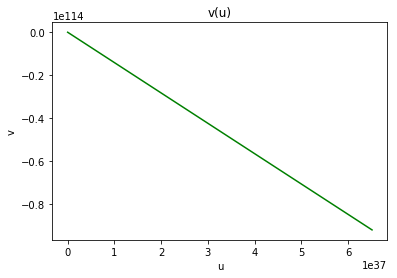

In [78]:
i = 0 
mas = [1,10,100,1000]
# print(len(a))

for i in range (len(mas)):
    
    t = 0

    f1 = open('Rung111.txt', 'w')
    f2 = open('Rung112.txt', 'w')
    f3 = open('Rung113.txt', 'w')

    h=0.01 #Длина шага у сеточной функции

    t = 0
    u = 2
    v = 0


    s1 = []
    s2 = []
    s3 = []
    T = []

    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')

    k1 = 0
    k2 = 0
    k3 = 0
    eps = 0.1
    
    while (t < 100):
        a = 0
        b = 0
        N = 0
        while (N < 100):
            a = f(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            b = g(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            N = N + 1
            if (abs(a - k1) + abs(b - k2) < eps):
                      break
            else:
                k1 = a
                l1 = b

        if (N == 100):  # ЕСЛИ МЕТОД ПРОСТОЙ ИТЕРАЦИИ ПЛОХО СХОДИТСЯ, ТО НА ЭТОМ ШАГЕ ЗАМЕНЯЕМ НЕЯВНЫЙ МЕТОД РУНГЕ-КУТТЫ НА ЯВНЫЙ
            u = u + h*f(t,u,v,mas[i])
            v = v + h*f(t,u,v,mas[i])
        else:
            u = u + 0.5*h*f(t,u,v,mas[i])
            v = v + 0.5*h*f(t,u,v,mas[i])
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')

    f1.close()
    f2.close()
    f3.close()
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", mas[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


    


### Неавтономное уравнение Ван-дер-Поля, траектория-«утка»

In [41]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, w):
    return (-10*((u*u*u)/3 - u) + 10*v)
def g(t,u,v,w):
    return (-u + cos(w*t))


Графики при  a = 1


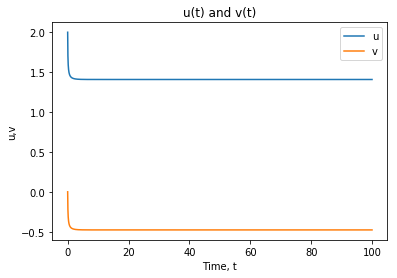

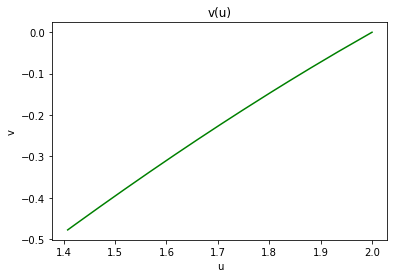

Графики при  a = 10


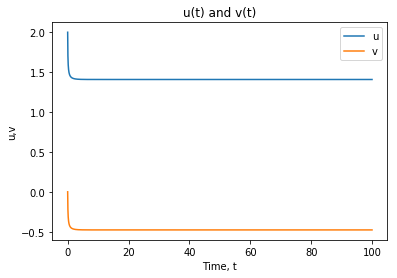

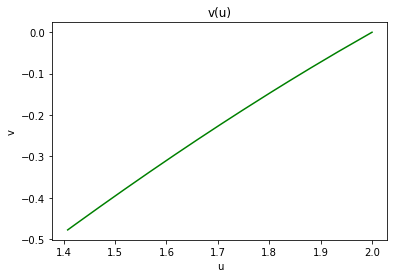

Графики при  a = 100


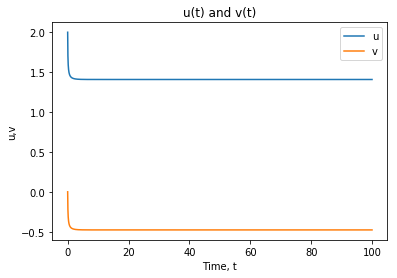

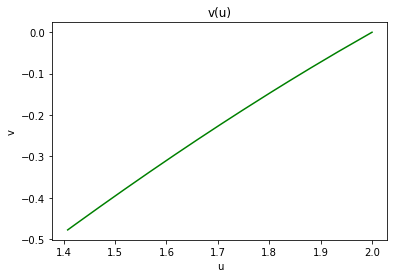

Графики при  a = 1000


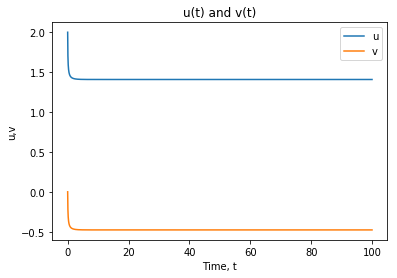

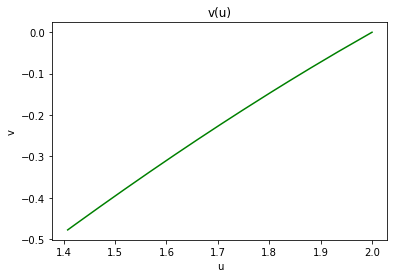

In [42]:
i = 0 
mas = [1,10,100,1000]
# print(len(a))

for i in range (len(mas)):
    
    t = 0

    f1 = open('Rung111.txt', 'w')
    f2 = open('Rung112.txt', 'w')
    f3 = open('Rung113.txt', 'w')

    h=0.01 #Длина шага у сеточной функции

    t = 0
    u = 2
    v = 0


    s1 = []
    s2 = []
    s3 = []
    T = []

    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')

    k1 = 0
    k2 = 0
    k3 = 0
    eps = 0.1
    
    while (t < 100):
        a = 0
        b = 0
        N = 0
        while (N < 100):
            a = f(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            b = g(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            N = N + 1
            if (abs(a - k1) + abs(b - k2)  < eps):
                      break
            else:
                k1 = a
                l1 = b

        if (N == 100):  # ЕСЛИ МЕТОД ПРОСТОЙ ИТЕРАЦИИ ПЛОХО СХОДИТСЯ, ТО НА ЭТОМ ШАГЕ ЗАМЕНЯЕМ НЕЯВНЫЙ МЕТОД РУНГЕ-КУТТЫ НА ЯВНЫЙ
            u = u + h*f(t,u,v,mas[i])
            v = v + h*f(t,u,v,mas[i])
        else:
            u = u + 0.5*h*f(t,u,v,mas[i])
            v = v + 0.5*h*f(t,u,v,mas[i])
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')

    f1.close()
    f2.close()
    f3.close()
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", mas[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


    


### Уравнение Рэлея

In [43]:
#a = int(input('Введите значение параметра a = ', ))
#h = float(input('Введите значение параметра h = ', ))
#print(a)
#print(h)

def f(t, u, v, a):
    return (a*(1 - u*u)*u - v)
def g(t,u,v,a):
    return (u)

Графики при  a = 1


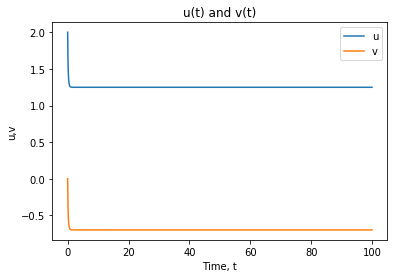

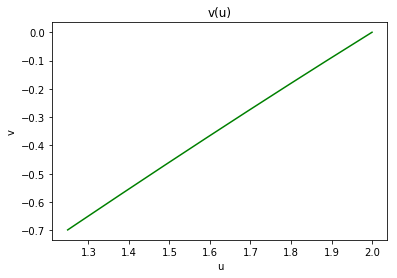

Графики при  a = 10


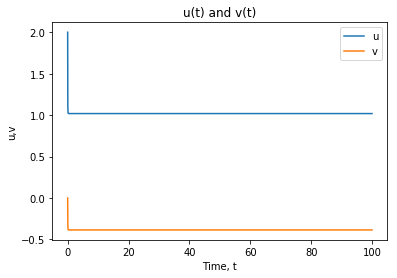

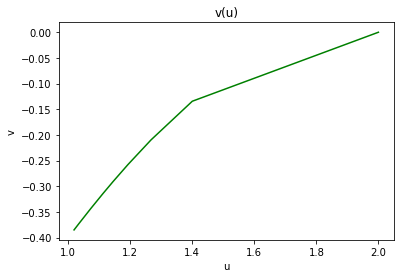

Графики при  a = 100


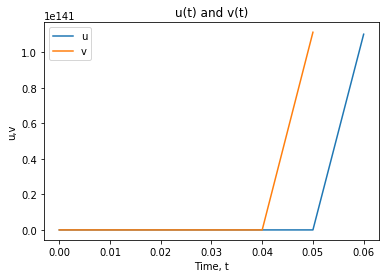

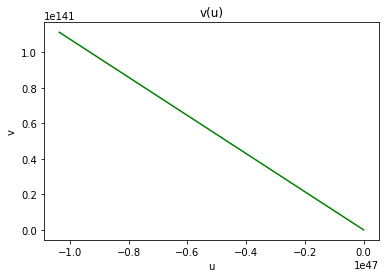

Графики при  a = 1000


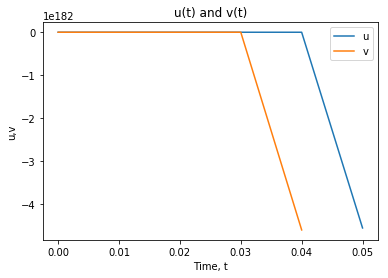

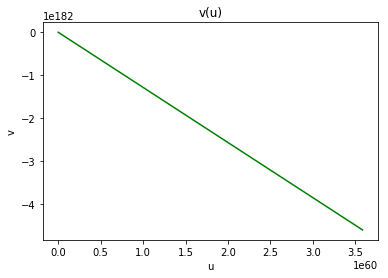

In [44]:
i = 0 
mas = [1,10,100,1000]
# print(len(a))

for i in range (len(mas)):
    
    t = 0

    f1 = open('Rung111.txt', 'w')
    f2 = open('Rung112.txt', 'w')
    f3 = open('Rung113.txt', 'w')

    h=0.01 #Длина шага у сеточной функции

    t = 0
    u = 2
    v = 0


    s1 = []
    s2 = []
    s3 = []
    T = []

    s1.append(u)
    s2.append(v)
    T.append(t)

    f1.write(str(u))
    f1.write('\n')
    f2.write(str(t))
    f2.write('\n')
    f3.write(str(v))
    f3.write('\n')

    k1 = 0
    k2 = 0
    k3 = 0
    eps = 0.1
    
    while (t < 100):
        a = 0
        b = 0
        N = 0
        while (N < 100):
            a = f(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            b = g(t + 0.5*h, u + h*(k1 + eps), v + h*(k2 + eps),mas[i])
            N = N + 1
            if (abs(a - k1) + abs(b - k2)  < eps):
                      break
            else:
                k1 = a
                l1 = b

        if (N == 100):  # ЕСЛИ МЕТОД ПРОСТОЙ ИТЕРАЦИИ ПЛОХО СХОДИТСЯ, ТО НА ЭТОМ ШАГЕ ЗАМЕНЯЕМ НЕЯВНЫЙ МЕТОД РУНГЕ-КУТТЫ НА ЯВНЫЙ
            u = u + h*f(t,u,v,mas[i])
            v = v + h*f(t,u,v,mas[i])
        else:
            u = u + 0.5*h*f(t,u,v,mas[i])
            v = v + 0.5*h*f(t,u,v,mas[i])
        t = t + h
    
        s1.append(u)
        s2.append(v)
        T.append(t)

        f1.write(str(u))
        f1.write('\n')
        f2.write(str(t))
        f2.write('\n')
        f3.write(str(v))
        f3.write('\n')

    f1.close()
    f2.close()
    f3.close()
    
    
    # Строим графики для каждого a[i]
    
    print("Графики при  a =", mas[i])
    
    plt.plot(T,s1,T,s2)       
    plt.legend(('u','v'))         
    plt.title('u(t) and v(t)')     
    plt.xlabel('Time, t')              
    plt.ylabel('u,v') 
    plt.show()

    plt.plot(s1, s2,"g")
    plt.title('v(u)')        
    plt.xlabel('u')               
    plt.ylabel('v')
    plt.show()
    
    f1.close()
    f2.close()
    f3.close()


    
